In [1]:
#9.5
import numpy as np

def triginterp(t, y):
    """
        triginterp(t, y)

    Return trigonometric interpolant for points defined by vectors t and y.
    """
    N = len(t)

    def trigcardinal(x):
        if x == 0:
            tau = 1.0
        elif np.mod(N, 2) == 1:  # odd
            tau = np.sin(N * np.pi * x / 2) / (N * np.sin(np.pi * x / 2))
        else:  # even
            tau = np.sin(N * np.pi * x / 2) / (N * np.tan(np.pi * x / 2))
        return tau

    def p(x):
        return np.sum([y[k] * trigcardinal(x - t[k]) for k in range(N)])

    return np.vectorize(p)

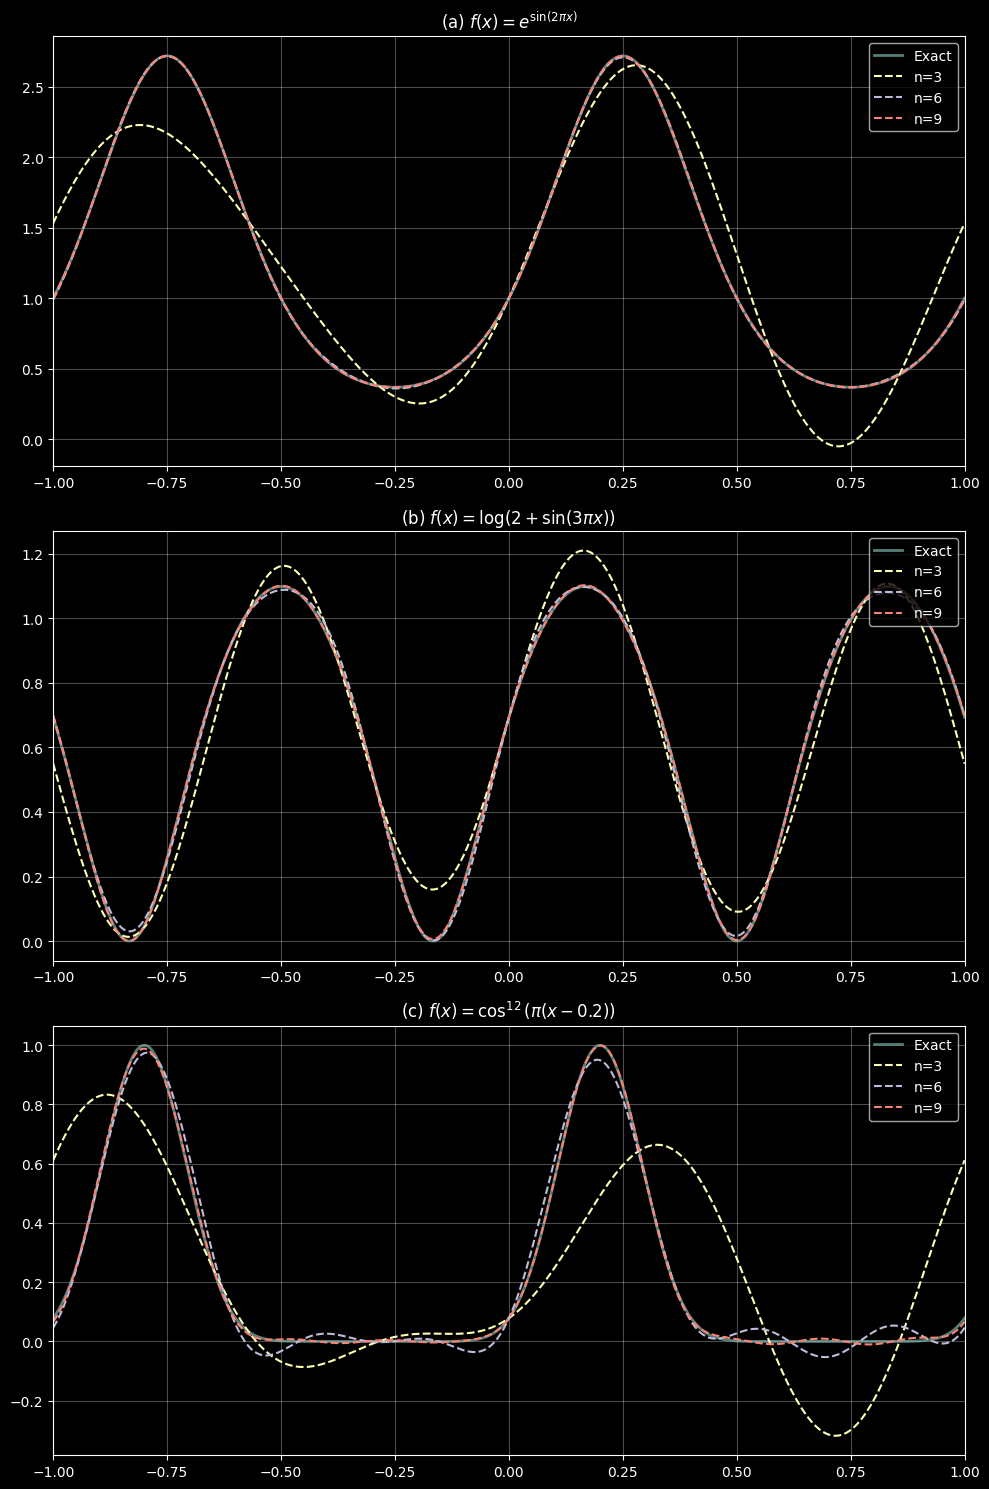

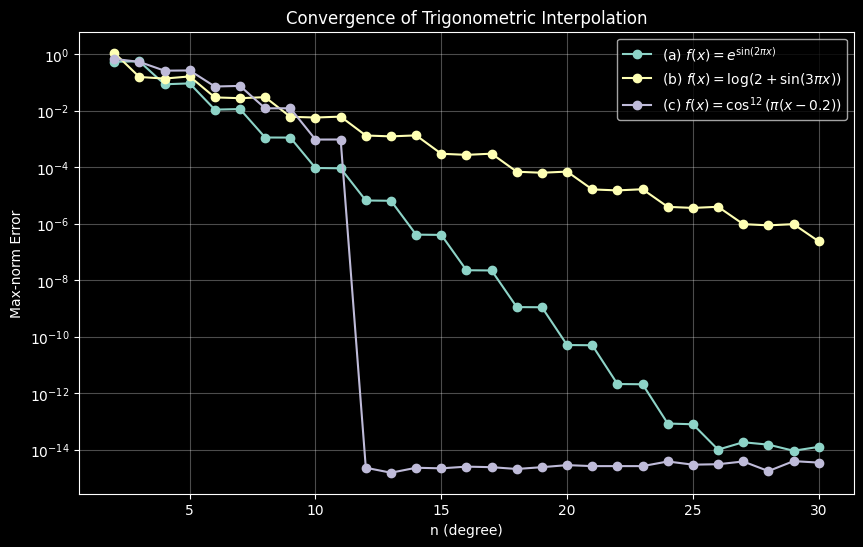

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def triginterp(t, y):
    N = len(t)

    def trigcardinal(x):
        if np.abs(x) < 1e-14:
            tau = 1.0
        elif np.mod(N, 2) == 1:
            tau = np.sin(N * np.pi * x / 2) / (N * np.sin(np.pi * x / 2))
        else:
            tau = np.sin(N * np.pi * x / 2) / (N * np.tan(np.pi * x / 2))
        return tau

    def p(x):
        return np.sum([y[k] * trigcardinal(x - t[k]) for k in range(N)])

    return np.vectorize(p)

func_a = lambda x: np.exp(np.sin(2 * np.pi * x))
func_b = lambda x: np.log(2 + np.sin(3 * np.pi * x))
func_c = lambda x: np.cos(np.pi * (x - 0.2))**12

functions = [func_a, func_b, func_c]
func_names = [
    r"(a) $f(x) = e^{\sin(2\pi x)}$",
    r"(b) $f(x) = \log(2 + \sin(3\pi x))$",
    r"(c) $f(x) = \cos^{12}(\pi(x - 0.2))$"
]

x_eval = np.linspace(-1, 1, 1000)

fig, axes = plt.subplots(3, 1, figsize=(10, 15))
n_plot_list = [3, 6, 9]

for i, f in enumerate(functions):
    ax = axes[i]
    ax.plot(x_eval, f(x_eval), linewidth=2, label='Exact', alpha=0.6)

    for n in n_plot_list:
        N = 2 * n + 1
        t = 2 * np.arange(-n, n + 1) / N
        y = f(t)

        p = triginterp(t, y)
        ax.plot(x_eval, p(x_eval), '--', label=f'n={n}')

    ax.set_title(func_names[i])
    ax.set_xlim(-1, 1)
    ax.legend(loc='upper right')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
n_range = range(2, 31)

for i, f in enumerate(functions):
    err = []
    for n in n_range:
        N = 2 * n + 1
        t = 2 * np.arange(-n, n + 1) / N
        y = f(t)

        p = triginterp(t, y)
        error_val = np.max(np.abs(p(x_eval) - f(x_eval)))
        err.append(error_val)

    plt.semilogy(n_range, err, "-o", label=func_names[i])

plt.xlabel("n (degree)")
plt.ylabel("Max-norm Error")
plt.title("Convergence of Trigonometric Interpolation")
plt.grid(True, which="both", ls="-", alpha=0.3)
plt.legend()
plt.show()

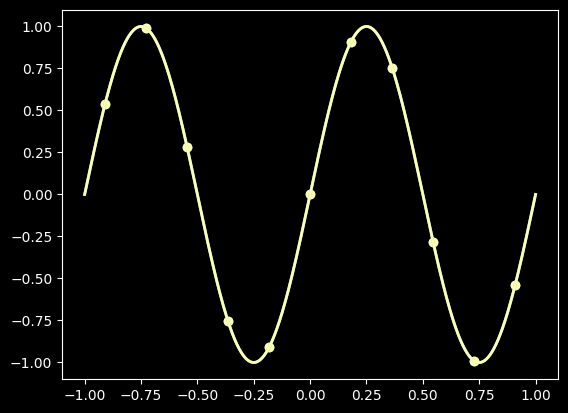

In [12]:
#9.5.2
import numpy as np
import matplotlib.pyplot as plt

def triginterp(t, y):
    N = len(t)

    def trigcardinal(x):
        if np.abs(x) < 1e-14:
            tau = 1.0
        elif np.mod(N, 2) == 1:
            tau = np.sin(N * np.pi * x / 2) / (N * np.sin(np.pi * x / 2))
        else:
            tau = np.sin(N * np.pi * x / 2) / (N * np.tan(np.pi * x / 2))
        return tau

    def p(x):
        return np.sum([y[k] * trigcardinal(x - t[k]) for k in range(N)])

    return np.vectorize(p)

r = -9
s = 2
func_r = lambda x: np.sin(r * np.pi * x)
func_s = lambda x: np.sin(s * np.pi * x)

N = 11
n = int((N - 1) / 2)
t = 2 * np.arange(-n, n + 1) / N
y_r = func_r(t)
y_s = func_s(t)

p_r = triginterp(t, y_r)
p_s = triginterp(t, y_s)
x = np.linspace(-1, 1, 1000)

plt.plot(x, p_r(x), label=r'$r$', linewidth=2)
plt.plot(x, p_s(x), label=r'$s$', linewidth=2)
plt.scatter(t, y_r)
plt.scatter(t, y_s)


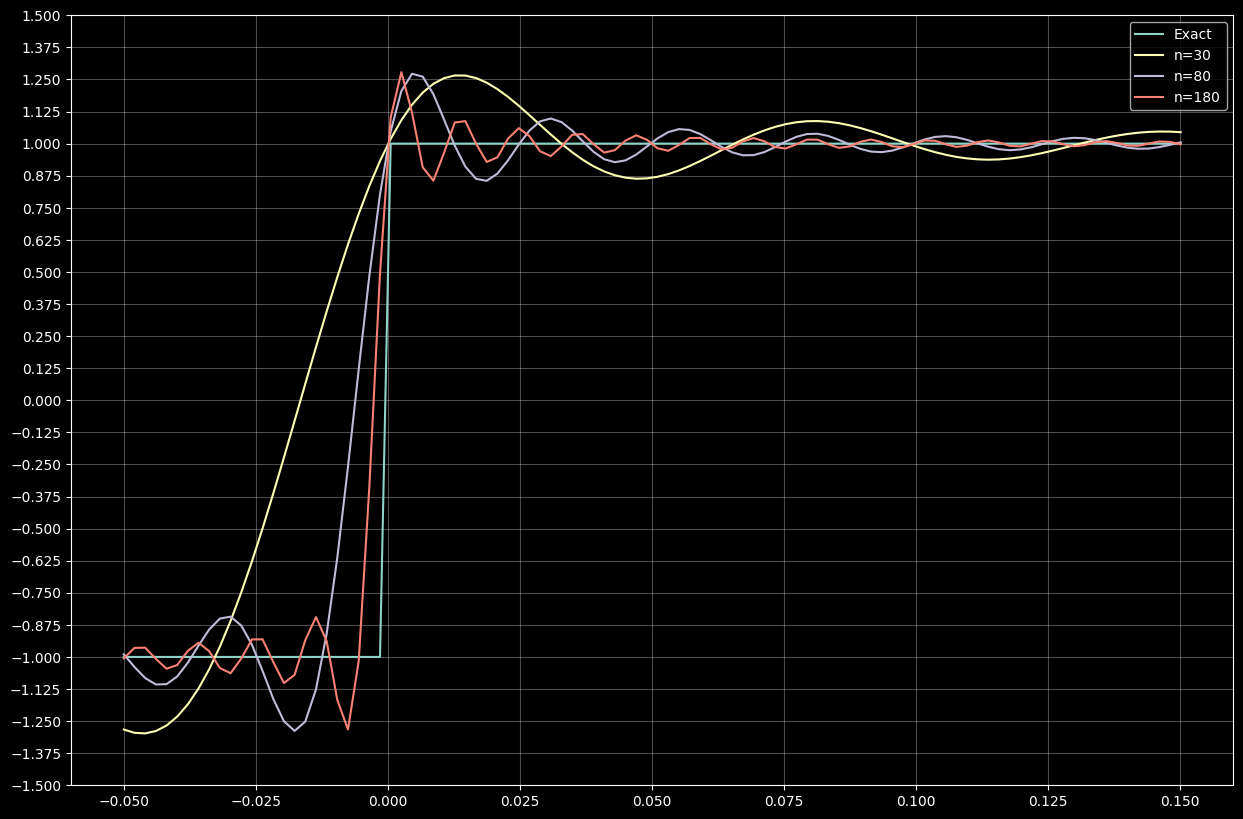

In [48]:
#9.5.5
import numpy as np
import matplotlib.pyplot as plt

def triginterp(t, y):
    N = len(t)

    def trigcardinal(x):
        if np.abs(x) < 1e-14:
            tau = 1.0
        elif np.mod(N, 2) == 1:
            tau = np.sin(N * np.pi * x / 2) / (N * np.sin(np.pi * x / 2))
        else:
            tau = np.sin(N * np.pi * x / 2) / (N * np.tan(np.pi * x / 2))
        return tau

    def p(x):
        return np.sum([y[k] * trigcardinal(x - t[k]) for k in range(N)])

    return np.vectorize(p)


eps = 1e-16
f = lambda x:np.sign(x + eps)
n = np.array([30, 80, 180])

plt.figure(figsize=(15, 10))
x = np.linspace(-0.0501, 0.1501, 100)
plt.plot(x, f(x))

for i in range(len(n)):
    N = 2 * n[i] + 1
    t = 2 * np.arange(-n[i], n[i] + 1) / N
    p = triginterp(t, f(t))
    plt.plot(x, p(x), label=f'n={n[i]}')

plt.legend(["Exact", "n=30", "n=80", "n=180"])
plt.yticks(np.linspace(-1.5, 1.5, 25))
plt.grid(True, which="both", ls="-", alpha=0.3)

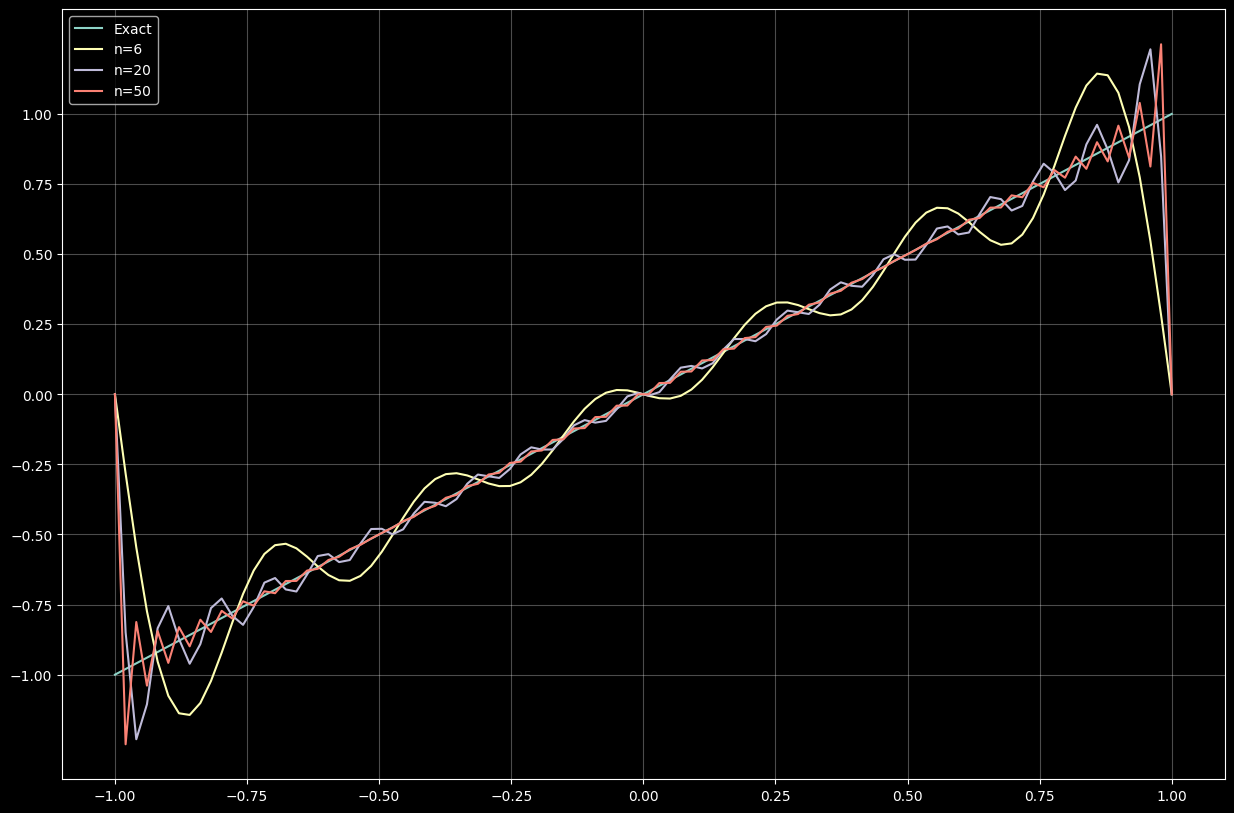

In [52]:
#9.5.6
import numpy as np
import matplotlib.pyplot as plt

def triginterp(t, y):
    N = len(t)

    def trigcardinal(x):
        if np.abs(x) < 1e-14:
            tau = 1.0
        elif np.mod(N, 2) == 1:
            tau = np.sin(N * np.pi * x / 2) / (N * np.sin(np.pi * x / 2))
        else:
            tau = np.sin(N * np.pi * x / 2) / (N * np.tan(np.pi * x / 2))
        return tau

    def p(x):
        return np.sum([y[k] * trigcardinal(x - t[k]) for k in range(N)])

    return np.vectorize(p)

f = lambda x: x
n = np.array([6, 20, 50])
plt.figure(figsize=(15, 10))
x = np.linspace(-1, 1, 100)
plt.plot(x, f(x))

for i in range(len(n)):
    N = 2 * n[i] + 1
    t = 2 * np.arange(-n[i], n[i] + 1) / N
    p = triginterp(t, f(t))
    plt.plot(x, p(x), label=f'n={n[i]}')

plt.legend(["Exact", "n=6", "n=20", "n=50"])
plt.yticks(np.linspace(-1, 1, 9))
plt.grid(True, which="both", ls="-", alpha=0.3)

